<a href="https://colab.research.google.com/github/MohanGavade/Mobile_Robotics/blob/main/Object_detection_Faster_RCNN_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 61.0MB/s]


In [ ]:
model.eval()

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
import torch
import torchvision
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from torchvision import transforms as T
from matplotlib import pyplot as plt
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from pathlib import Path

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

data_path = Path("drive/")
sub_data_path = data_path / "MyDrive"
image_path = sub_data_path / "swisslog_parking_cars"
import os
os.chdir("/content/drive/MyDrive/swisslog_parking_cars")

Mounted at /content/drive


In [ ]:
img = plt.imread("/content/drive/MyDrive/swisslog_parking_cars/swisslog.png")

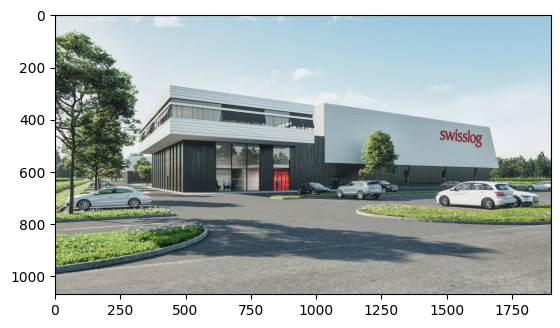

In [ ]:
plt.imshow(img)

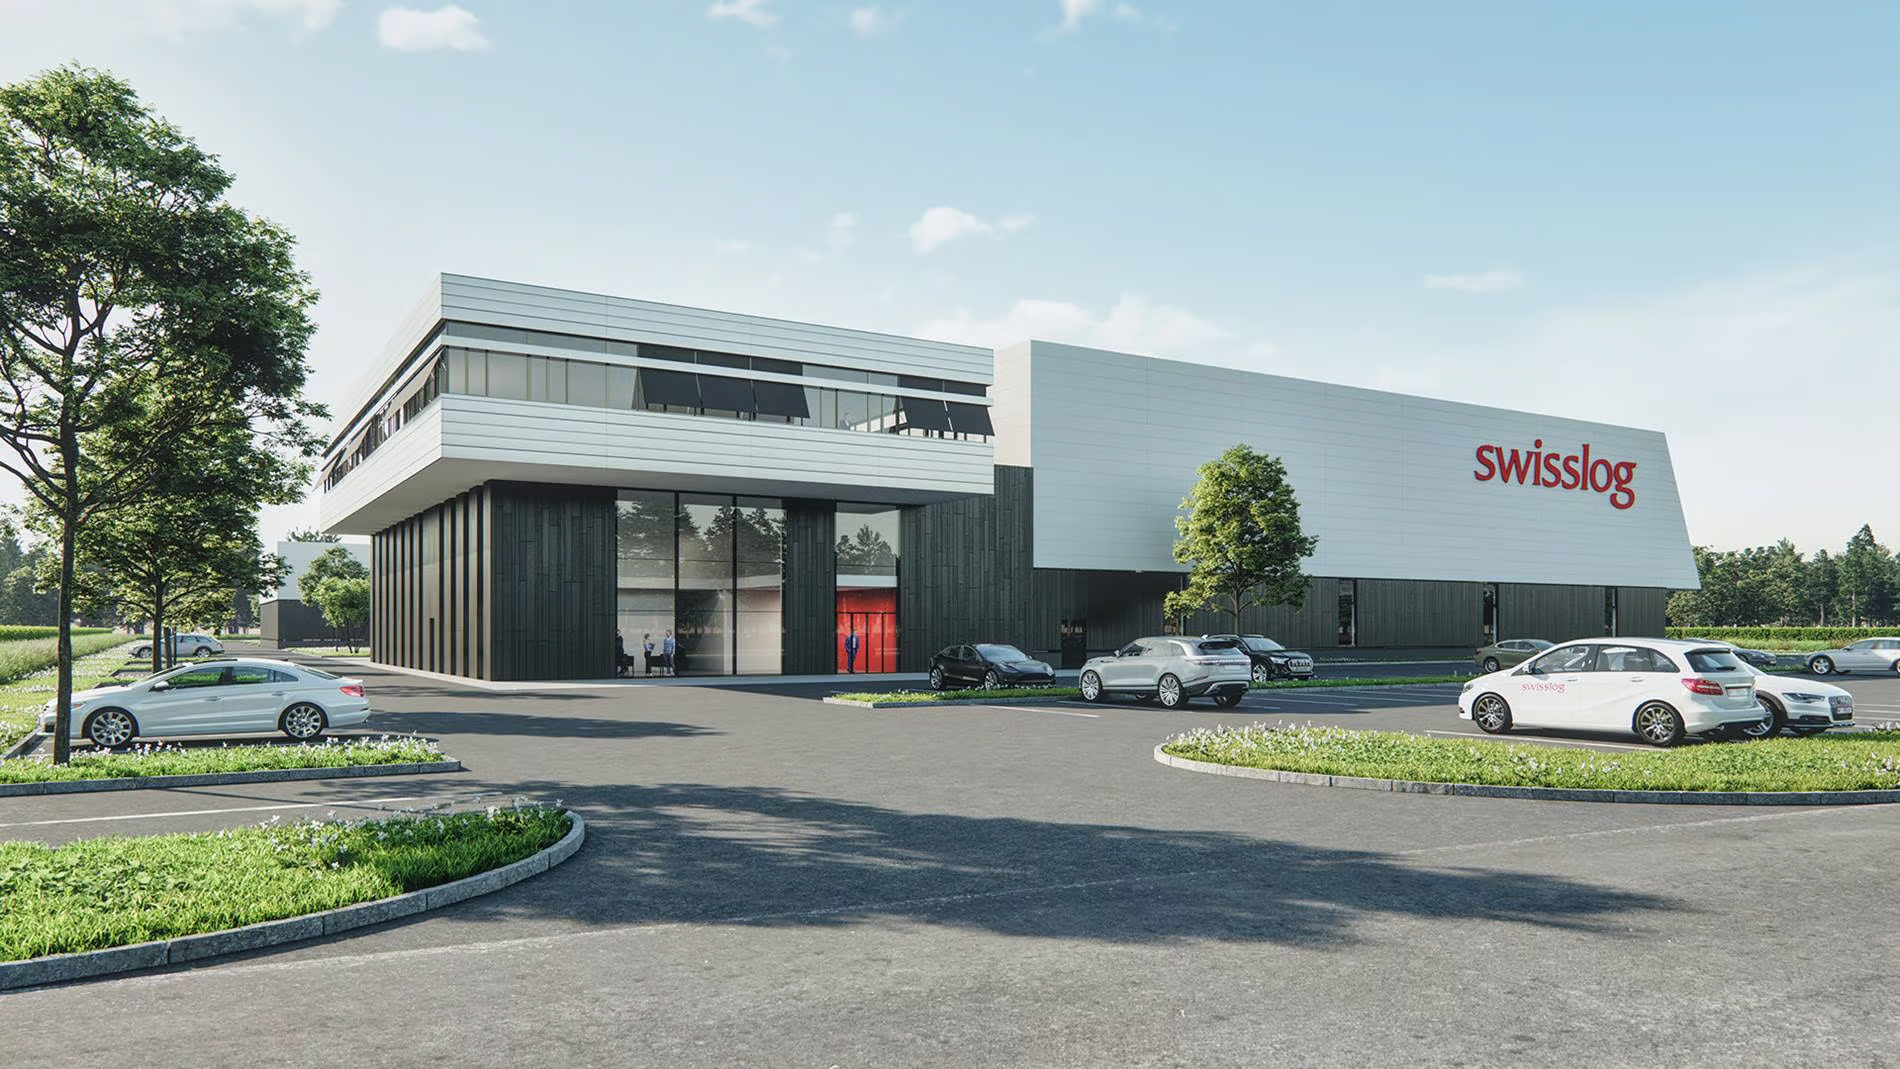

In [ ]:
ig = Image.open("/content/drive/MyDrive/swisslog_parking_cars/swisslog.png")
ig

In [ ]:
transform = T.ToTensor()
img = transform(ig)

In [ ]:
with torch.no_grad():
  pred = model([img])
pred

[{'boxes': tensor([[  29.1738,  652.5026,  378.7839,  754.7119],
          [1456.1630,  637.4476, 1774.3710,  748.2228],
          [1804.3462,  639.9231, 1900.0000,  677.1758],
          [1074.2512,  635.8755, 1253.3739,  708.6420],
          [1473.1782,  636.0563, 1555.0352,  675.3649],
          [1205.3694,  633.3702, 1316.2483,  683.0159],
          [ 929.8510,  642.1390, 1055.7683,  688.7322],
          [ 661.3036,  628.2167,  675.6252,  676.2132],
          [ 641.2711,  632.2454,  654.5727,  675.8090],
          [1729.4716,  653.5976, 1858.6084,  733.9549],
          [ 125.5890,  630.5083,  227.1653,  663.5247],
          [ 613.5858,  631.2035,  629.8793,  676.0154],
          [ 647.8318,  631.3221,  674.8821,  676.0771],
          [ 668.5593,  629.9498,  681.8279,  677.0479],
          [ 647.2175,  634.4155,  662.0381,  674.2189],
          [ 633.1744,  631.2471,  659.8776,  677.3654],
          [1735.2610,  648.5304, 1829.0941,  676.3031],
          [1669.2565,  641.8339, 1867.4

In [ ]:
pred[0].keys()

dict_keys(['boxes', 'labels', 'scores'])

In [ ]:
bboxes, labels, scores = pred[0]["boxes"], pred[0]["labels"],pred[0]["scores"]

In [ ]:
bboxes, labels, scores

(tensor([[  29.1738,  652.5026,  378.7839,  754.7119],
         [1456.1630,  637.4476, 1774.3710,  748.2228],
         [1804.3462,  639.9231, 1900.0000,  677.1758],
         [1074.2512,  635.8755, 1253.3739,  708.6420],
         [1473.1782,  636.0563, 1555.0352,  675.3649],
         [1205.3694,  633.3702, 1316.2483,  683.0159],
         [ 929.8510,  642.1390, 1055.7683,  688.7322],
         [ 661.3036,  628.2167,  675.6252,  676.2132],
         [ 641.2711,  632.2454,  654.5727,  675.8090],
         [1729.4716,  653.5976, 1858.6084,  733.9549],
         [ 125.5890,  630.5083,  227.1653,  663.5247],
         [ 613.5858,  631.2035,  629.8793,  676.0154],
         [ 647.8318,  631.3221,  674.8821,  676.0771],
         [ 668.5593,  629.9498,  681.8279,  677.0479],
         [ 647.2175,  634.4155,  662.0381,  674.2189],
         [ 633.1744,  631.2471,  659.8776,  677.3654],
         [1735.2610,  648.5304, 1829.0941,  676.3031],
         [1669.2565,  641.8339, 1867.4982,  683.5250],
         [

In [ ]:
scores

tensor([0.9987, 0.9980, 0.9909, 0.9899, 0.9864, 0.9825, 0.9785, 0.9713, 0.9552,
        0.9518, 0.9180, 0.8034, 0.7423, 0.7164, 0.4046, 0.3904, 0.3335, 0.3247,
        0.3239, 0.2891, 0.2667, 0.2095, 0.1850, 0.1526, 0.1502, 0.1485, 0.1219,
        0.1159, 0.1097, 0.0866, 0.0862, 0.0760, 0.0690, 0.0673, 0.0630])

In [ ]:
num=torch.argwhere(scores > 0.3).shape[0]
num


19

In [ ]:
labels

tensor([ 3,  3,  3,  3,  3,  3,  3,  1,  1,  3,  3,  1,  1,  1,  1,  1,  3,  3,
         1,  1,  3,  1,  3, 14,  3,  3,  3,  3,  1,  3,  1,  3,  3,  3,  1])

In [ ]:
coco_names = ["person" , "bicycle" , "car" , "motorcycle" , "airplane" , "bus" , "train" , "truck" , "boat" , "traffic light" , "fire hydrant" , "street sign" , "stop sign" , "parking meter" , "bench" , "bird" , "cat" , "dog" , "horse" , "sheep" , "cow" , "elephant" , "bear" , "zebra" , "giraffe" , "hat" , "backpack" , "umbrella" , "shoe" , "eye glasses" , "handbag" , "tie" , "suitcase" ,
"frisbee" , "skis" , "snowboard" , "sports ball" , "kite" , "baseball bat" ,
"baseball glove" , "skateboard" , "surfboard" , "tennis racket" , "bottle" ,
"plate" , "wine glass" , "cup" , "fork" , "knife" , "spoon" , "bowl" ,
"banana" , "apple" , "sandwich" , "orange" , "broccoli" , "carrot" , "hot dog" ,
"pizza" , "donut" , "cake" , "chair" , "couch" , "potted plant" , "bed" ,
"mirror" , "dining table" , "window" , "desk" , "toilet" , "door" , "tv" ,
"laptop" , "mouse" , "remote" , "keyboard" , "cell phone" , "microwave" ,
"oven" , "toaster" , "sink" , "refrigerator" , "blender" , "book" ,
"clock" , "vase" , "scissors" , "teddy bear" , "hair drier" , "toothbrush" , "hair brush"]

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
igg = cv2.imread("/content/drive/MyDrive/swisslog_parking_cars/swisslog.png")
for i in range(num):
  x1, y1, x2, y2 = bboxes[i].numpy().astype("int")
  class_name = coco_names[labels.numpy()[i]-1]
  igg = cv2.rectangle(igg, (x1,y1), (x2,y2), (0,255,0), 1)
  igg = cv2.putText(igg, class_name, (x1, y1-10), font, 0.5, (255,0,0),1,cv2.LINE_AA)
  print(x1,y1,x2,y2)

29 652 378 754
1456 637 1774 748
1804 639 1900 677
1074 635 1253 708
1473 636 1555 675
1205 633 1316 683
929 642 1055 688
661 628 675 676
641 632 654 675
1729 653 1858 733
125 630 227 663
613 631 629 676
647 631 674 676
668 629 681 677
647 634 662 674
633 631 659 677
1735 648 1829 676
1669 641 1867 683
674 635 686 675


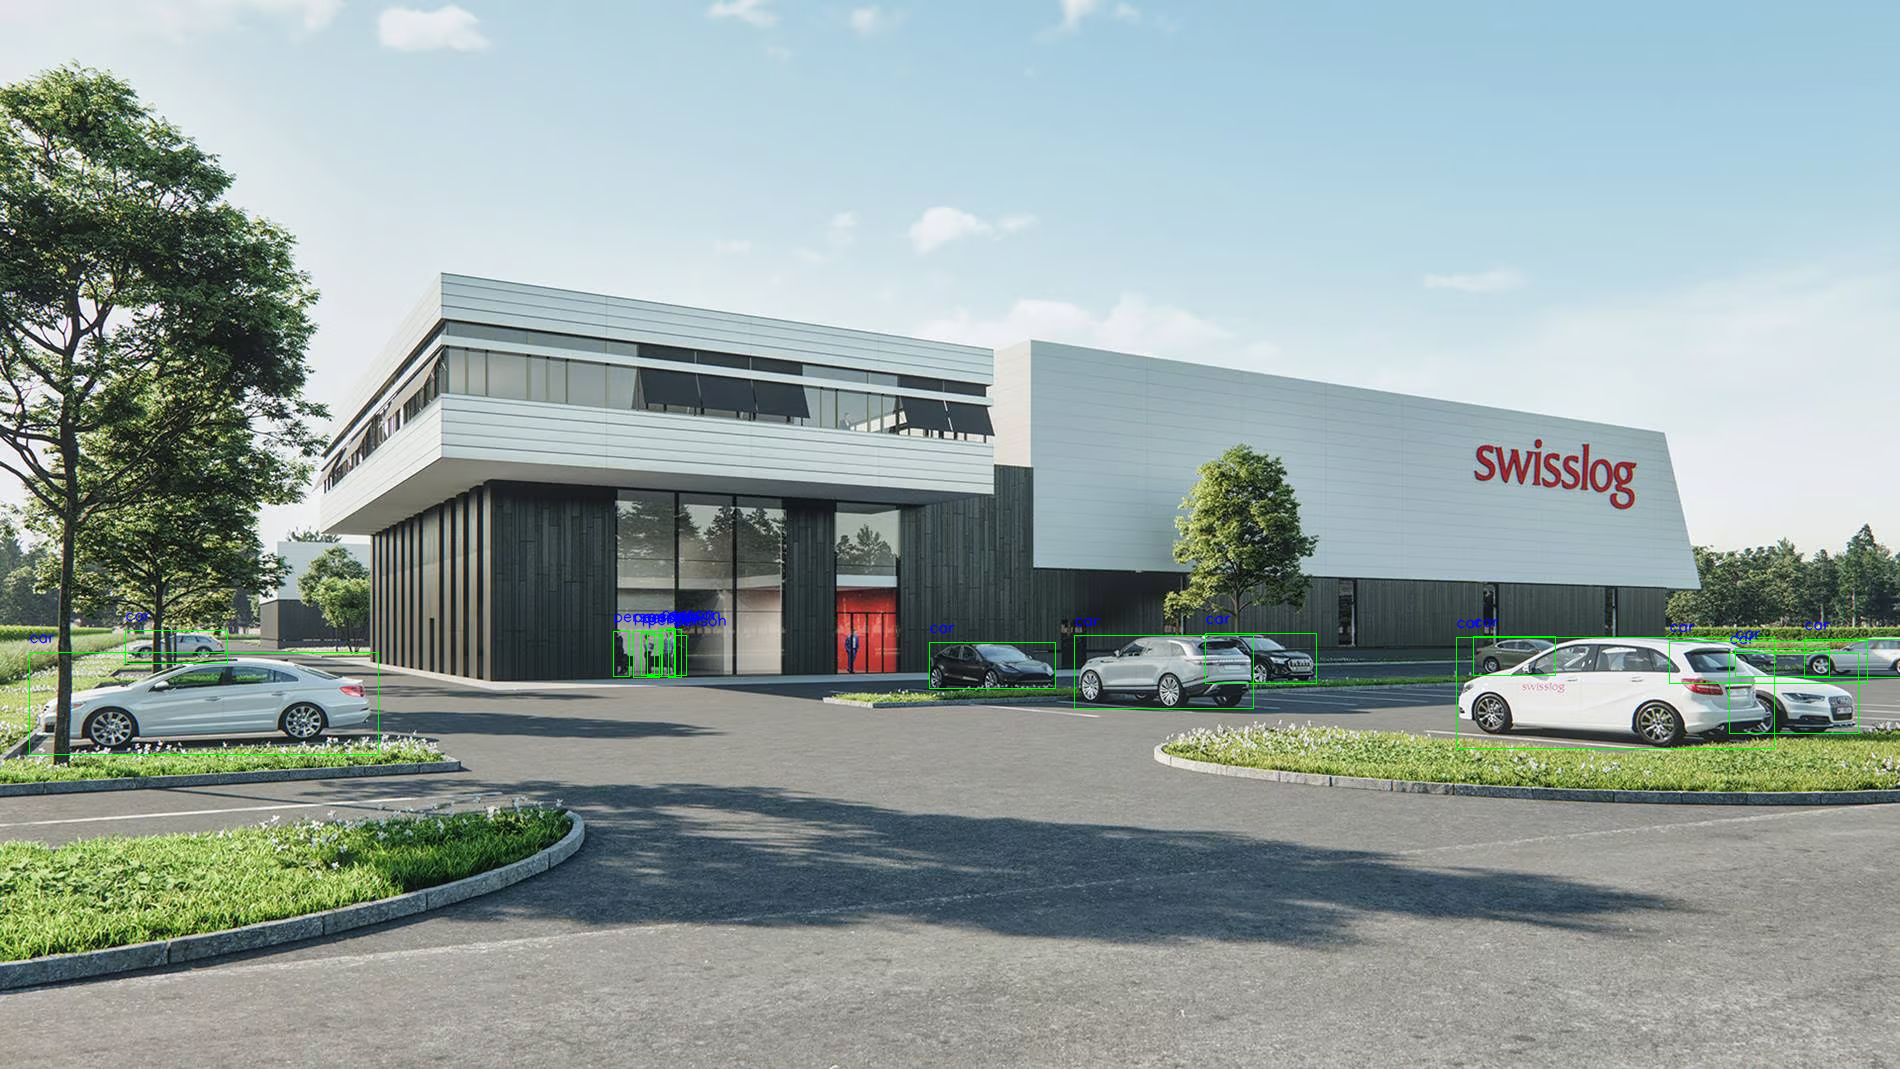

In [ ]:
cv2_imshow(igg)

In [ ]:
labels

tensor([ 3,  3,  3,  3,  3,  3,  3,  1,  1,  3,  3,  1,  1,  1,  1,  1,  3,  3,
         1,  1,  3,  1,  3, 14,  3,  3,  3,  3,  1,  3,  1,  3,  3,  3,  1])

In [ ]:
bboxes

tensor([[  29.1738,  652.5026,  378.7839,  754.7119],
        [1456.1630,  637.4476, 1774.3710,  748.2228],
        [1804.3462,  639.9231, 1900.0000,  677.1758],
        [1074.2512,  635.8755, 1253.3739,  708.6420],
        [1473.1782,  636.0563, 1555.0352,  675.3649],
        [1205.3694,  633.3702, 1316.2483,  683.0159],
        [ 929.8510,  642.1390, 1055.7683,  688.7322],
        [ 661.3036,  628.2167,  675.6252,  676.2132],
        [ 641.2711,  632.2454,  654.5727,  675.8090],
        [1729.4716,  653.5976, 1858.6084,  733.9549],
        [ 125.5890,  630.5083,  227.1653,  663.5247],
        [ 613.5858,  631.2035,  629.8793,  676.0154],
        [ 647.8318,  631.3221,  674.8821,  676.0771],
        [ 668.5593,  629.9498,  681.8279,  677.0479],
        [ 647.2175,  634.4155,  662.0381,  674.2189],
        [ 633.1744,  631.2471,  659.8776,  677.3654],
        [1735.2610,  648.5304, 1829.0941,  676.3031],
        [1669.2565,  641.8339, 1867.4982,  683.5250],
        [ 674.1406,  635.057